# Intelligent Flow: Leveraging Machine Learning  for Urban Traffic Management

## Project Objective and Goal:
The main goal is to leverage machine learning techniques to enhance urban traffic management in Heidelberg by predicting traffic intensity through various locations and times.

## Research Question:
How can we accurately predict traffic intensity variations across different times and locations in Heidelberg using machine learning models?

## Machine Learning Aim:
To apply and evaluate SARIMAX and Prophet models on traffic data, tuned to predict daily, weekly, and business-day traffic intensities effectively, thereby assisting in better urban planning and congestion management.

## Dataset 
Traffic cameras in the city of Heidelberg
The dataset contains an observation of the traffic flow at a specific place and time. It contains current and past measurements from traffic cameras in the city of Heidelberg (measurement interval: 15 min).
In addition to general location information, each dataset contains, if available, information on the number of vehicles and vehicle types measured, the average distance between vehicles and their passing time.
A detailed description of the dataset,the specification, and the raw data can be found here: 
https://ckan.datenplattform.heidelberg.de/de/dataset/mobility_main_trafficcamera
<br>In the accuired traffic data the volume of traffic is represented as the count of the number of vehicles passing every 15 mins. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
#from FP_Funtions import *

In [4]:
L637 = '6c3c621c-8710-4485-ac45-e201879cf9ae.csv'
Neckarstaden_1_3 = '2a469ef6-634b-435a-874b-9fd40ba9bd5c.csv'
Am_Hackteufel_2 ='2d93d846-83c2-4b2c-afbd-25c17d421c0d.csv'
Im_Neuenheimer_Feld_253 ='4d63ef2f-d4c2-4cf1-81a8-ec9430d74725.csv'
Vangerowstraße_69 ='4fdf4ee7-c226-4a33-a695-85f6c9e712f1.csv'
Kirchheimer_Weg_14 ='05e8ef1c-fcf6-473c-89cc-bfab0accdcf1.csv'
Mönchhofstraße_6 = '7e6b52dd-740b-4e1f-9c74-467905bc10ba.csv'
Lessingstrasse_15 = '5725a391-c537-4724-9575-abc0fd7bc47a.csv'
Vangerowstraße_103 = 'b266a9b9-7a63-46b0-b8ce-408fd7395512.csv'
Bergheimer_Straße_B37 ='b95871b2-7de0-46b1-b377-db497250f8a0.csv'
Lessingstraße_12 = 'dc5200b1-8783-4800-82cb-4f5718c00581.csv'
Baumschulenweg_12 = 'ef443489-03bf-4607-9bc7-41472473639c.csv'


In [5]:
data1 = pd.read_csv(L637)
data2 = pd.read_csv(Neckarstaden_1_3)
data3 = pd.read_csv(Am_Hackteufel_2)
data4 = pd.read_csv(Im_Neuenheimer_Feld_253)
data5 = pd.read_csv(Vangerowstraße_69)
data6 = pd.read_csv(Kirchheimer_Weg_14)
data7 = pd.read_csv(Mönchhofstraße_6)
data8 = pd.read_csv(Lessingstrasse_15)
data9 = pd.read_csv(Vangerowstraße_103)
data10 = pd.read_csv(Bergheimer_Straße_B37)
data11 = pd.read_csv(Lessingstraße_12)
data12 = pd.read_csv(Baumschulenweg_12)

### Initial analysis and data wrangling 

In [6]:
datasets = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12]

datasets = {
    'data1': data1,
    'data2': data2,
    'data3': data3,
    'data4': data4,
    'data5': data5,
    'data6': data6,
    'data7': data7,
    'data8': data8,
    'data9': data9,
    'data10': data10,
    'data11': data11,
    'data12': data12,
}

In [7]:
for name, dataset in datasets.items():
    print(f'\n {name}')
    print (dataset.info())



 data1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57374 entries, 0 to 57373
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   57374 non-null  int64  
 1   recvTime              57374 non-null  object 
 2   fiwareServicePath     57374 non-null  object 
 3   entityId              57374 non-null  object 
 4   entityType            57374 non-null  object 
 5   averageVehicleSpeed   0 non-null      float64
 6   occupancy             0 non-null      float64
 7   latitude              57374 non-null  float64
 8   postalCode            57374 non-null  int64  
 9   description           0 non-null      float64
 10  source                0 non-null      float64
 11  seeAlso               0 non-null      float64
 12  vehicleSubType        0 non-null      float64
 13  laneDirection         0 non-null      float64
 14  addressLocality       57374 non-null  object 
 15  vehicleType

In [8]:
for name, dataset in datasets.items():
    null =[col for col in dataset.columns if dataset[col].isna().sum() == dataset.shape[0]]
    print(f'\n {name},{null}')



 data1,['averageVehicleSpeed', 'occupancy', 'description', 'source', 'seeAlso', 'vehicleSubType', 'laneDirection', 'owner', 'averageGapDistance', 'areaServed', 'averageHeadwayTime', 'averageVehicleLength', 'alternateName', 'congested', 'reversedLane', 'laneId', 'refRoadSegment', 'name', 'dataProvider']

 data2,['averageVehicleSpeed', 'occupancy', 'description', 'source', 'seeAlso', 'vehicleSubType', 'laneDirection', 'owner', 'averageGapDistance', 'areaServed', 'averageHeadwayTime', 'averageVehicleLength', 'alternateName', 'congested', 'reversedLane', 'laneId', 'refRoadSegment', 'name', 'dataProvider']

 data3,['averageVehicleSpeed', 'occupancy', 'description', 'source', 'seeAlso', 'vehicleSubType', 'laneDirection', 'owner', 'averageGapDistance', 'areaServed', 'averageHeadwayTime', 'averageVehicleLength', 'alternateName', 'congested', 'reversedLane', 'laneId', 'refRoadSegment', 'name', 'dataProvider']

 data4,['averageVehicleSpeed', 'occupancy', 'description', 'source', 'seeAlso', 'veh

In [9]:
data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12], axis=0)

print(data.shape)
data.head()

(1292270, 35)


,_id,recvTime,fiwareServicePath,entityId,entityType,averageVehicleSpeed,occupancy,latitude,postalCode,description,...,alternateName,dateObservedFrom,congested,reversedLane,intensity,laneId,streetAddress,refRoadSegment,name,dataProvider
0,1,2022-11-03T14:05:29.957Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,NaN,NaN,49.420944,69123,NaN,...,NaN,2022-11-03T13:40:00.000Z,NaN,NaN,164,NaN,L637,NaN,NaN,NaN
1,2,2022-11-03T14:05:29.959Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,NaN,NaN,49.420944,69123,NaN,...,NaN,2022-11-03T13:40:00.000Z,NaN,NaN,3,NaN,L637,NaN,NaN,NaN
2,3,2022-11-03T14:05:29.989Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,NaN,NaN,49.420944,69123,NaN,...,NaN,2022-11-03T13:40:00.000Z,NaN,NaN,7,NaN,L637,NaN,NaN,NaN
3,4,2022-11-03T14:05:29.982Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,NaN,NaN,49.420944,69123,NaN,...,NaN,2022-11-03T13:40:00.000Z,NaN,NaN,36,NaN,L637,NaN,NaN,NaN
4,5,2022-11-03T14:15:31.869Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,NaN,NaN,49.420944,69123,NaN,...,NaN,2022-11-03T13:55:00.000Z,NaN,NaN,202,NaN,L637,NaN,NaN,NaN


#### Merging all datasets

In [10]:
null =[col for col in data.columns if data[col].isna().sum() == data.shape[0]]
data = data.drop(columns = null)
data

,_id,recvTime,fiwareServicePath,entityId,entityType,latitude,postalCode,addressLocality,vehicleType,longitude,dateObservedTo,addressCountry,dateObserved,dateObservedFrom,intensity,streetAddress
0,1,2022-11-03T14:05:29.957Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,49.420944,69123,Heidelberg,car,8.640556,2022-11-03T13:55:00.000Z,Deutschland,2022-11-03T13:55:00.000Z,2022-11-03T13:40:00.000Z,164,L637
1,2,2022-11-03T14:05:29.959Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,49.420944,69123,Heidelberg,motorcycle,8.640556,2022-11-03T13:55:00.000Z,Deutschland,2022-11-03T13:55:00.000Z,2022-11-03T13:40:00.000Z,3,L637
2,3,2022-11-03T14:05:29.989Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,49.420944,69123,Heidelberg,lorry,8.640556,2022-11-03T13:55:00.000Z,Deutschland,2022-11-03T13:55:00.000Z,2022-11-03T13:40:00.000Z,7,L637
3,4,2022-11-03T14:05:29.982Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,49.420944,69123,Heidelberg,van,8.640556,2022-11-03T13:55:00.000Z,Deutschland,2022-11-03T13:55:00.000Z,2022-11-03T13:40:00.000Z,36,L637
4,5,2022-11-03T14:15:31.869Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4...,TrafficFlowObserved,49.420944,69123,Heidelberg,car,8.640556,2022-11-03T14:10:00.000Z,Deutschland,2022-11-03T14:10:00.000Z,2022-11-03T13:55:00.000Z,202,L637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108747,109195,2024-02-01T08:15:06.193Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:3403dbdb-dd66-4...,TrafficFlowObserved,49.396487,69124,Heidelberg,van,8.667444,2024-02-01T08:10:00.000Z,Deutschland,2024-02-01T08:10:00.000Z,2024-02-01T07:55:00.000Z,2,Baumschulenweg 12
108748,109196,2024-02-01T08:15:06.484Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:3403dbdb-dd66-4...,TrafficFlowObserved,49.396487,69124,Heidelberg,lorry,8.667444,2024-02-01T08:10:00.000Z,Deutschland,2024-02-01T08:10:00.000Z,2024-02-01T07:55:00.000Z,7,Baumschulenweg 12
108749,109197,2024-02-01T08:30:05.668Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:3403dbdb-dd66-4...,TrafficFlowObserved,49.396487,69124,Heidelberg,car,8.667444,2024-02-01T08:25:00.000Z,Deutschland,2024-02-01T08:25:00.000Z,2024-02-01T08:10:00.000Z,49,Baumschulenweg 12
108750,109198,2024-02-01T08:30:05.984Z,/main/trafficcamera,urn:ngsiv2:TrafficFlowObserved:3403dbdb-dd66-4...,TrafficFlowObserved,49.396487,69124,Heidelberg,van,8.667444,2024-02-01T08:25:00.000Z,Deutschland,2024-02-01T08:25:00.000Z,2024-02-01T08:10:00.000Z,3,Baumschulenweg 12


In [11]:
col_to_check = ['fiwareServicePath','entityId','entityType','addressLocality','addressCountry']
for col in col_to_check:
    print(data[col].unique())

['/main/trafficcamera']
['urn:ngsiv2:TrafficFlowObserved:1e1e69be-f894-4db3-ae69-d1394e49c852'
 'urn:ngsiv2:TrafficFlowObserved:7cfd6a06-3e81-4684-9aea-9c486475ec5b'
 'urn:ngsiv2:TrafficFlowObserved:b0a0594f-95cf-4bc9-b1a8-1d0c19c3fbad'
 'urn:ngsiv2:TrafficFlowObserved:130a084c-a7e1-403a-891e-0e34c52b8afa'
 'urn:ngsiv2:TrafficFlowObserved:56d18b33-038a-4fd9-a9aa-6e7dcb6f7293'
 'urn:ngsiv2:TrafficFlowObserved:7f69b1f6-b13b-4f13-a970-56a3e88b071a'
 'urn:ngsiv2:TrafficFlowObserved:20951a57-2e18-4e17-ba68-b98db74c63ea'
 'urn:ngsiv2:TrafficFlowObserved:a50fd4d9-e153-4b1b-9dd5-70846caff24a'
 'urn:ngsiv2:TrafficFlowObserved:0ef8e794-ea09-4b51-83af-fa939a86945d'
 'urn:ngsiv2:TrafficFlowObserved:2d458741-2a9a-45ba-a062-f8a790a976aa'
 'urn:ngsiv2:TrafficFlowObserved:8ef25839-7e73-408a-8025-89b2e1bc01b6'
 'urn:ngsiv2:TrafficFlowObserved:3403dbdb-dd66-4752-a595-05d0febeeb7d']
['TrafficFlowObserved']
['Heidelberg']
['Deutschland']


In [12]:
data = data.drop(columns = col_to_check) 

In [13]:
data

,_id,recvTime,latitude,postalCode,vehicleType,longitude,dateObservedTo,dateObserved,dateObservedFrom,intensity,streetAddress
0,1,2022-11-03T14:05:29.957Z,49.420944,69123,car,8.640556,2022-11-03T13:55:00.000Z,2022-11-03T13:55:00.000Z,2022-11-03T13:40:00.000Z,164,L637
1,2,2022-11-03T14:05:29.959Z,49.420944,69123,motorcycle,8.640556,2022-11-03T13:55:00.000Z,2022-11-03T13:55:00.000Z,2022-11-03T13:40:00.000Z,3,L637
2,3,2022-11-03T14:05:29.989Z,49.420944,69123,lorry,8.640556,2022-11-03T13:55:00.000Z,2022-11-03T13:55:00.000Z,2022-11-03T13:40:00.000Z,7,L637
3,4,2022-11-03T14:05:29.982Z,49.420944,69123,van,8.640556,2022-11-03T13:55:00.000Z,2022-11-03T13:55:00.000Z,2022-11-03T13:40:00.000Z,36,L637
4,5,2022-11-03T14:15:31.869Z,49.420944,69123,car,8.640556,2022-11-03T14:10:00.000Z,2022-11-03T14:10:00.000Z,2022-11-03T13:55:00.000Z,202,L637
...,...,...,...,...,...,...,...,...,...,...,...
108747,109195,2024-02-01T08:15:06.193Z,49.396487,69124,van,8.667444,2024-02-01T08:10:00.000Z,2024-02-01T08:10:00.000Z,2024-02-01T07:55:00.000Z,2,Baumschulenweg 12
108748,109196,2024-02-01T08:15:06.484Z,49.396487,69124,lorry,8.667444,2024-02-01T08:10:00.000Z,2024-02-01T08:10:00.000Z,2024-02-01T07:55:00.000Z,7,Baumschulenweg 12
108749,109197,2024-02-01T08:30:05.668Z,49.396487,69124,car,8.667444,2024-02-01T08:25:00.000Z,2024-02-01T08:25:00.000Z,2024-02-01T08:10:00.000Z,49,Baumschulenweg 12
108750,109198,2024-02-01T08:30:05.984Z,49.396487,69124,van,8.667444,2024-02-01T08:25:00.000Z,2024-02-01T08:25:00.000Z,2024-02-01T08:10:00.000Z,3,Baumschulenweg 12


In [14]:
data = data.reset_index(drop =True)

In [15]:
# Converting the types
data['recvTime'] = pd.to_datetime(data['recvTime'])
data['dateObserved'] = pd.to_datetime(data['dateObserved'])
data['dateObservedFrom'] = pd.to_datetime(data['dateObservedFrom'])
data['dateObservedTo'] = pd.to_datetime(data['dateObservedTo'])

In [16]:
# hour of the day from recvTime
data['hourOfDay'] = data['dateObserved'].dt.hour
data['date'] = data['dateObserved'].dt.date
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

In [17]:
data.isna().sum()

_id                 0
recvTime            0
latitude            0
postalCode          0
vehicleType         0
longitude           0
dateObservedTo      0
dateObserved        0
dateObservedFrom    0
intensity           0
streetAddress       0
hourOfDay           0
date                0
year                0
month               0
dtype: int64

In [18]:
data

,_id,recvTime,latitude,postalCode,vehicleType,longitude,dateObservedTo,dateObserved,dateObservedFrom,intensity,streetAddress,hourOfDay,date,year,month
0,1,2022-11-03 14:05:29.957000+00:00,49.420944,69123,car,8.640556,2022-11-03 13:55:00+00:00,2022-11-03 13:55:00+00:00,2022-11-03 13:40:00+00:00,164,L637,13,2022-11-03,2022,11
1,2,2022-11-03 14:05:29.959000+00:00,49.420944,69123,motorcycle,8.640556,2022-11-03 13:55:00+00:00,2022-11-03 13:55:00+00:00,2022-11-03 13:40:00+00:00,3,L637,13,2022-11-03,2022,11
2,3,2022-11-03 14:05:29.989000+00:00,49.420944,69123,lorry,8.640556,2022-11-03 13:55:00+00:00,2022-11-03 13:55:00+00:00,2022-11-03 13:40:00+00:00,7,L637,13,2022-11-03,2022,11
3,4,2022-11-03 14:05:29.982000+00:00,49.420944,69123,van,8.640556,2022-11-03 13:55:00+00:00,2022-11-03 13:55:00+00:00,2022-11-03 13:40:00+00:00,36,L637,13,2022-11-03,2022,11
4,5,2022-11-03 14:15:31.869000+00:00,49.420944,69123,car,8.640556,2022-11-03 14:10:00+00:00,2022-11-03 14:10:00+00:00,2022-11-03 13:55:00+00:00,202,L637,14,2022-11-03,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292265,109195,2024-02-01 08:15:06.193000+00:00,49.396487,69124,van,8.667444,2024-02-01 08:10:00+00:00,2024-02-01 08:10:00+00:00,2024-02-01 07:55:00+00:00,2,Baumschulenweg 12,8,2024-02-01,2024,2
1292266,109196,2024-02-01 08:15:06.484000+00:00,49.396487,69124,lorry,8.667444,2024-02-01 08:10:00+00:00,2024-02-01 08:10:00+00:00,2024-02-01 07:55:00+00:00,7,Baumschulenweg 12,8,2024-02-01,2024,2
1292267,109197,2024-02-01 08:30:05.668000+00:00,49.396487,69124,car,8.667444,2024-02-01 08:25:00+00:00,2024-02-01 08:25:00+00:00,2024-02-01 08:10:00+00:00,49,Baumschulenweg 12,8,2024-02-01,2024,2
1292268,109198,2024-02-01 08:30:05.984000+00:00,49.396487,69124,van,8.667444,2024-02-01 08:25:00+00:00,2024-02-01 08:25:00+00:00,2024-02-01 08:10:00+00:00,3,Baumschulenweg 12,8,2024-02-01,2024,2


In [19]:
data.vehicleType.unique()

array(['car', 'motorcycle', 'lorry', 'van'], dtype=object)

#### One-hot encoding

In [20]:
# One-hot encode 'vehicleType'
encoder = OneHotEncoder(sparse_output=False)
vehicle_type_encoded = encoder.fit_transform(data[['vehicleType']])
vehicle_type_encoded_df = pd.DataFrame(vehicle_type_encoded, columns=encoder.get_feature_names_out(['vehicleType']))

In [21]:
# One-hot encode locations
encoder = OneHotEncoder(sparse_output=False)
vehicle_type_encoded = encoder.fit_transform(data[['vehicleType']])
vehicle_type_encoded_df = pd.DataFrame(vehicle_type_encoded, columns=encoder.get_feature_names_out(['vehicleType']))

In [22]:
print(data.index.is_unique)
print(vehicle_type_encoded_df.index.is_unique)

True
True


In [23]:
data_preprocessed = pd.concat([data, vehicle_type_encoded_df], axis=1)

In [24]:
adresses = data_preprocessed.streetAddress.unique()

### Exploratory Data Analysis

#### Traffic intensity variation throughout the day

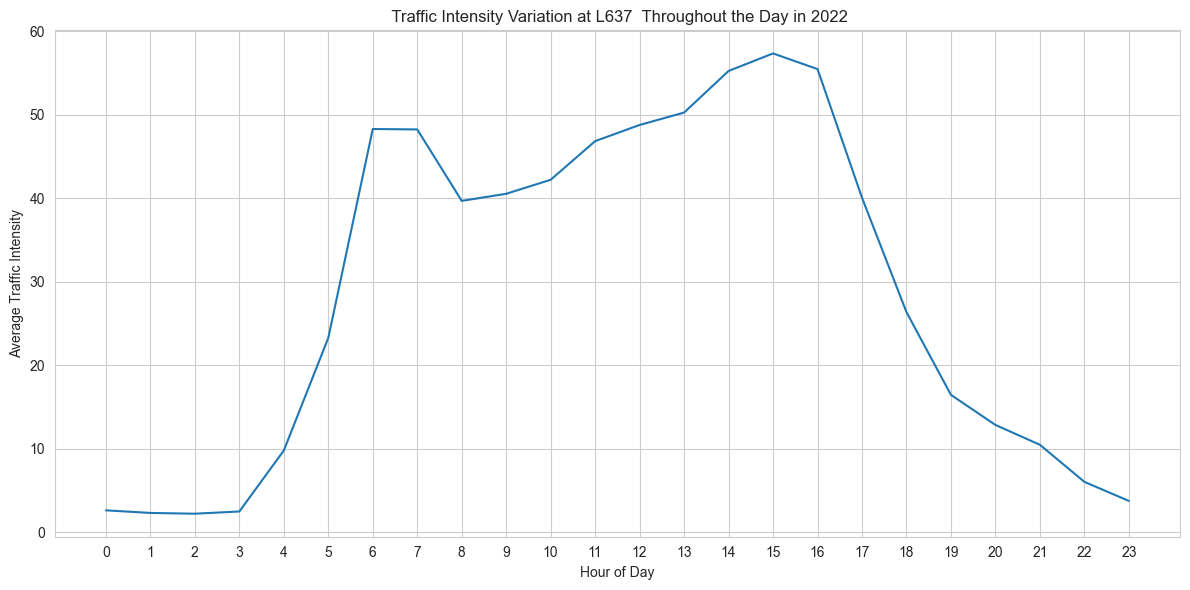

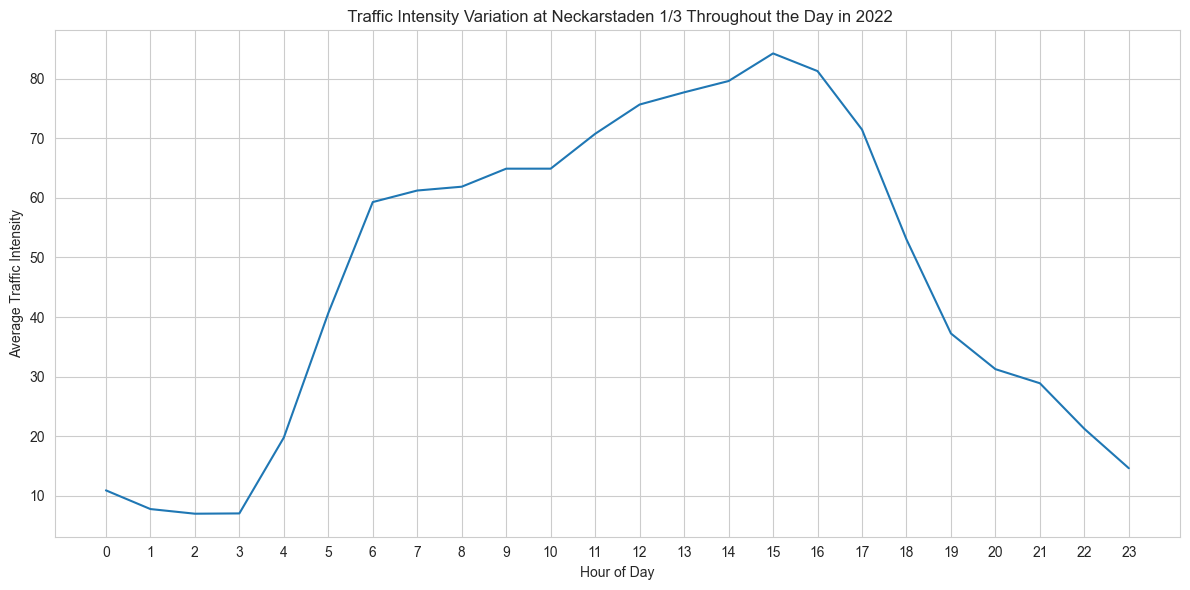

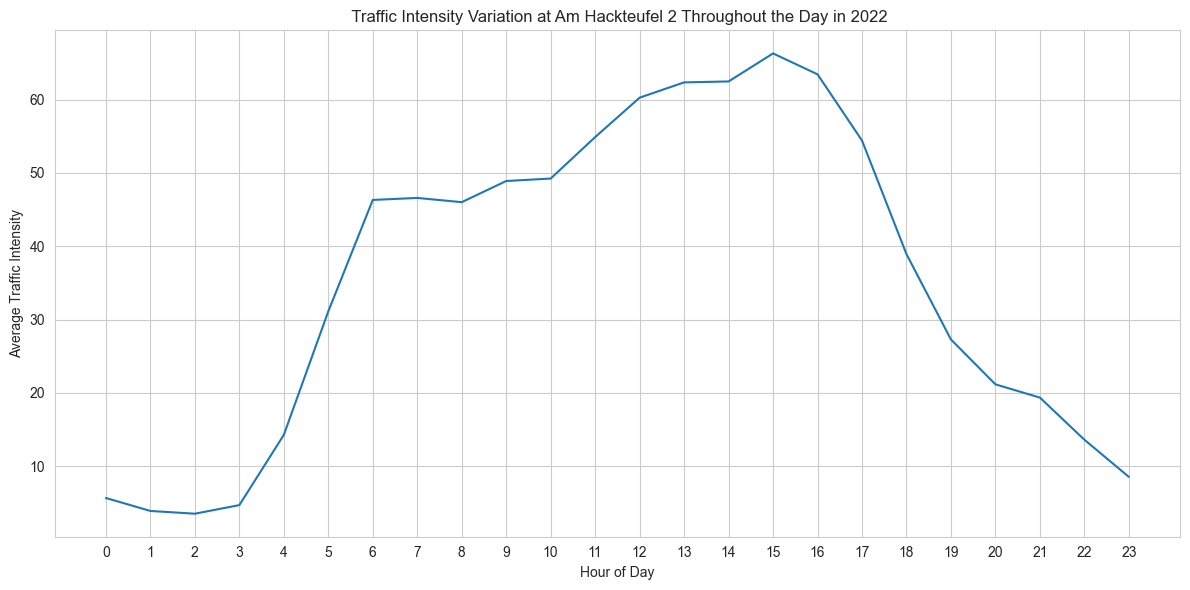

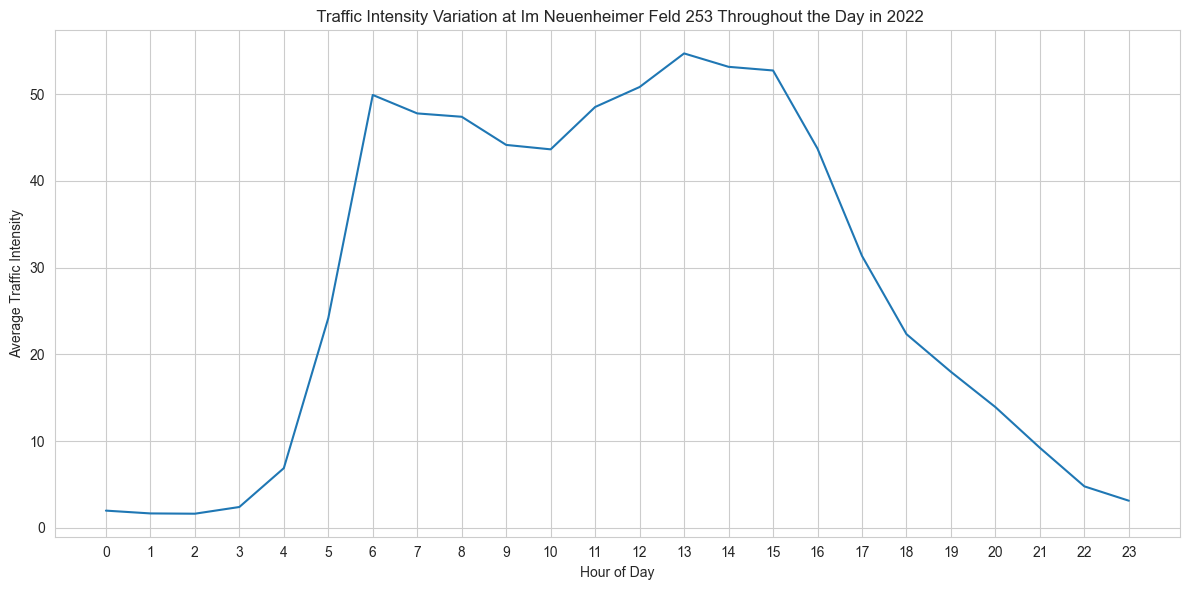

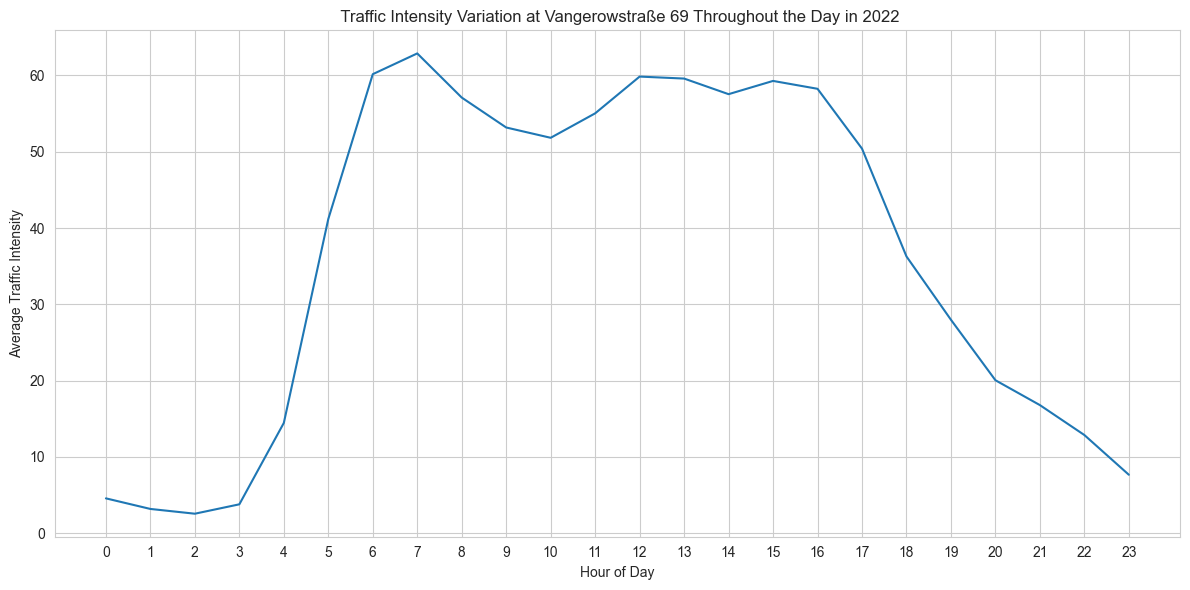

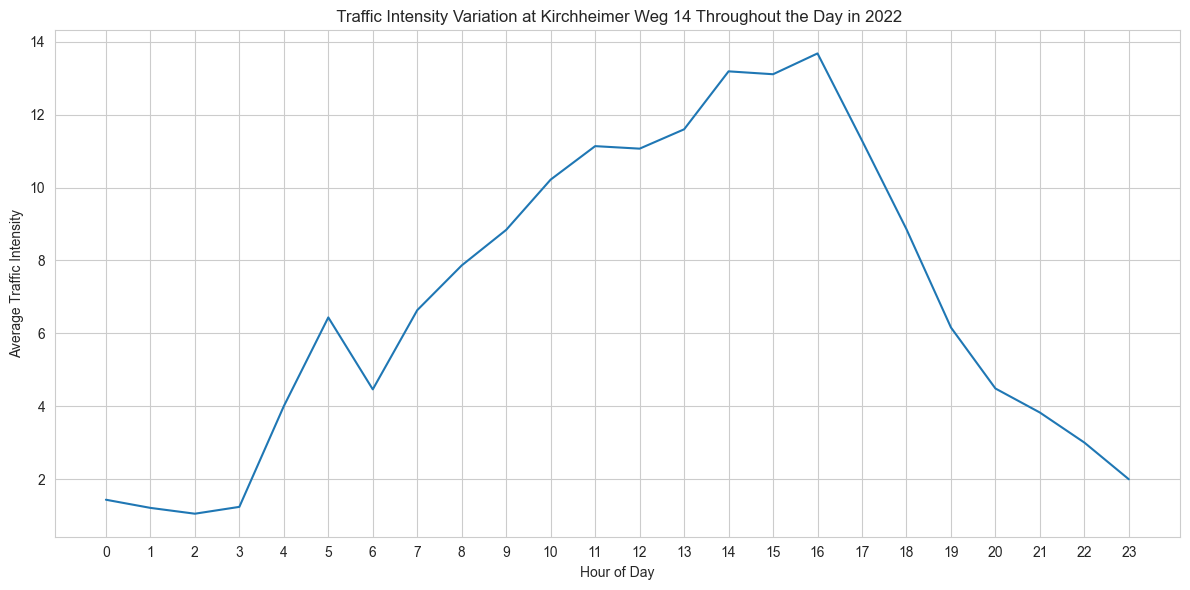

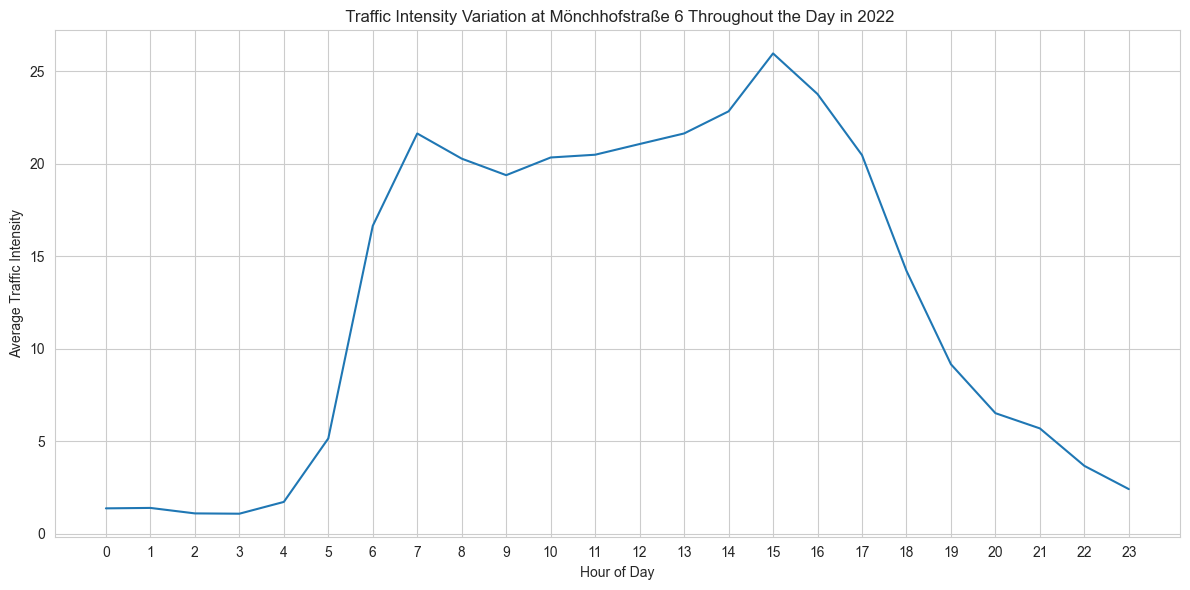

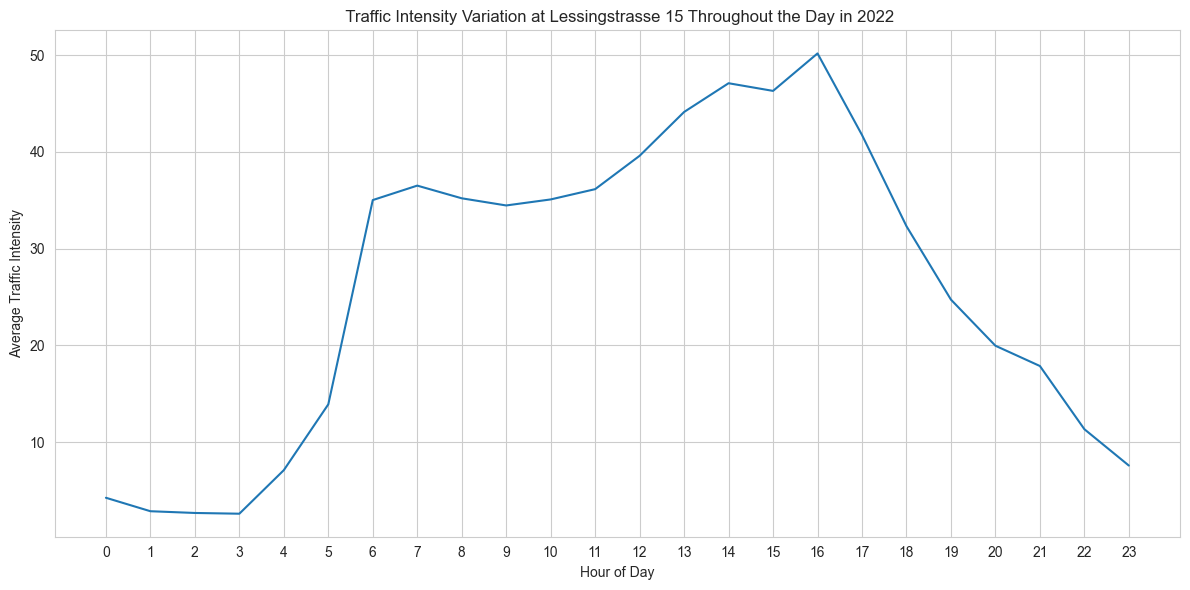

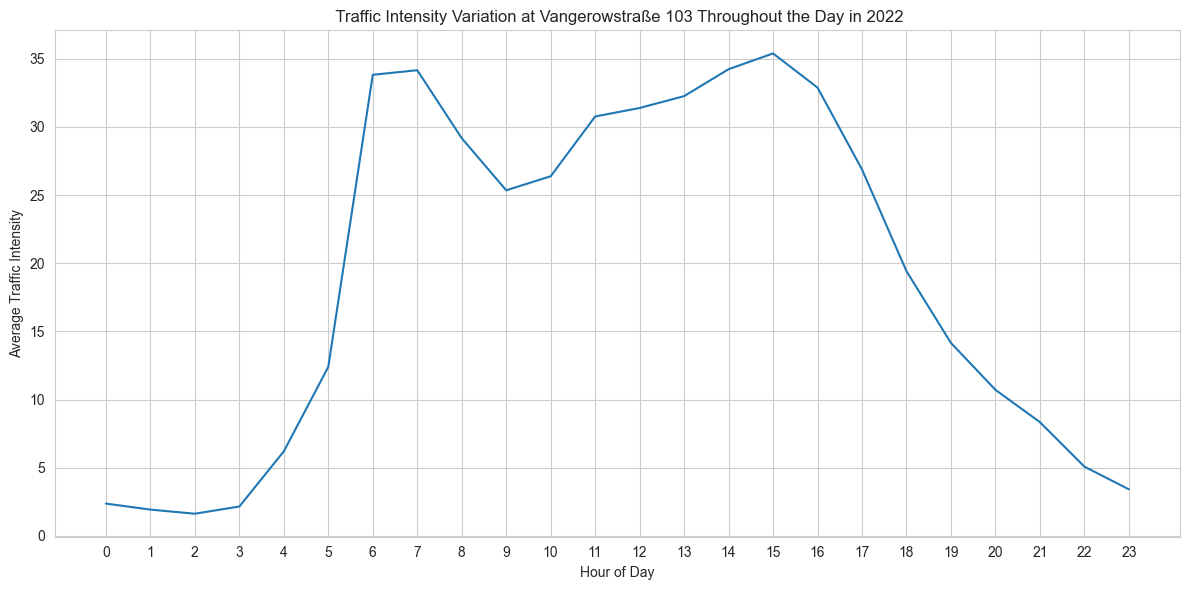

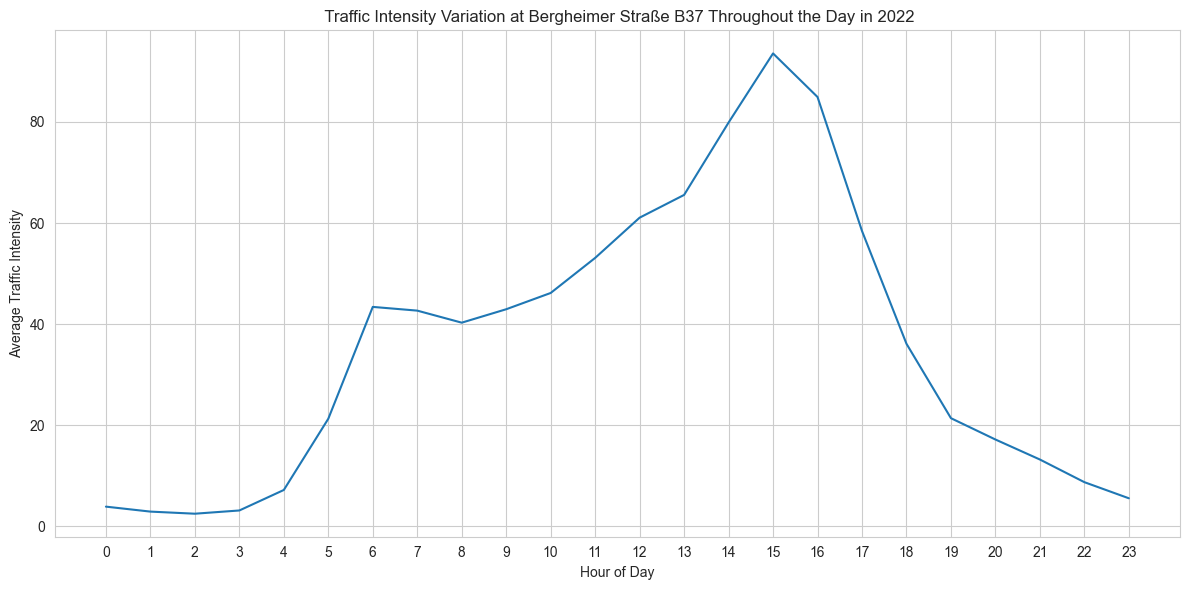

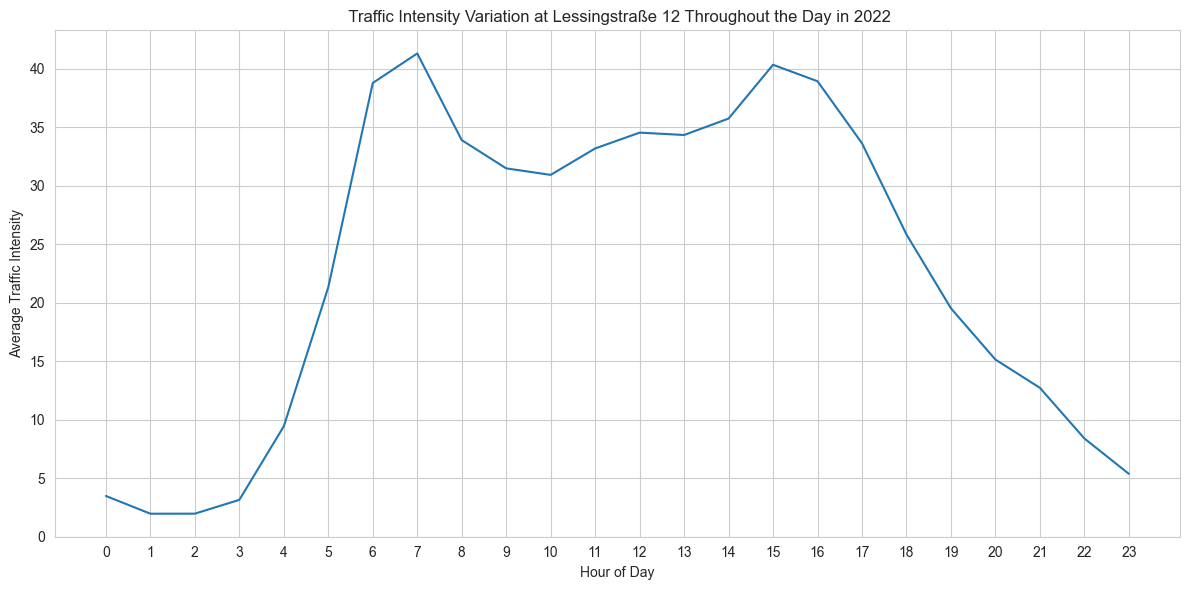

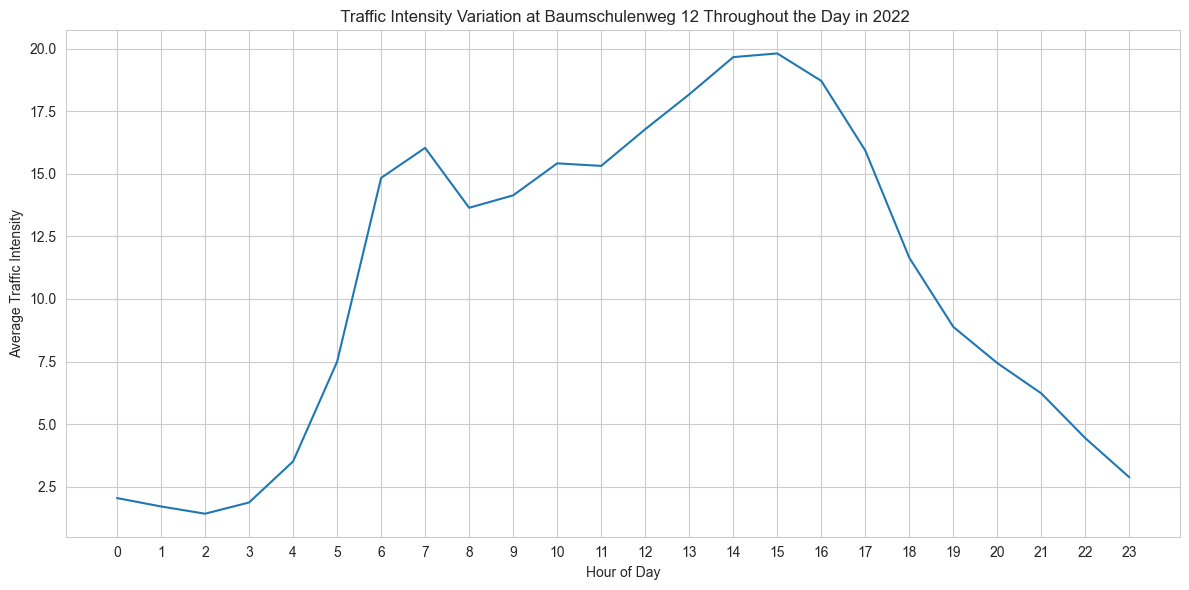

In [25]:
adresses = data_preprocessed.streetAddress.unique()
for adress in adresses: 
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    sns.lineplot(x='hourOfDay', y='intensity', data=data_preprocessed[(data_preprocessed['year']==2022)& (data_preprocessed['streetAddress']== adress)], estimator='mean', errorbar=None)
    plt.title(f' Traffic Intensity Variation at {adress} Throughout the Day in 2022')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Traffic Intensity')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()

#note estimatorname : Method for aggregating across multiple observations of the y variable at the same x level. If None, all observations will be drawn.

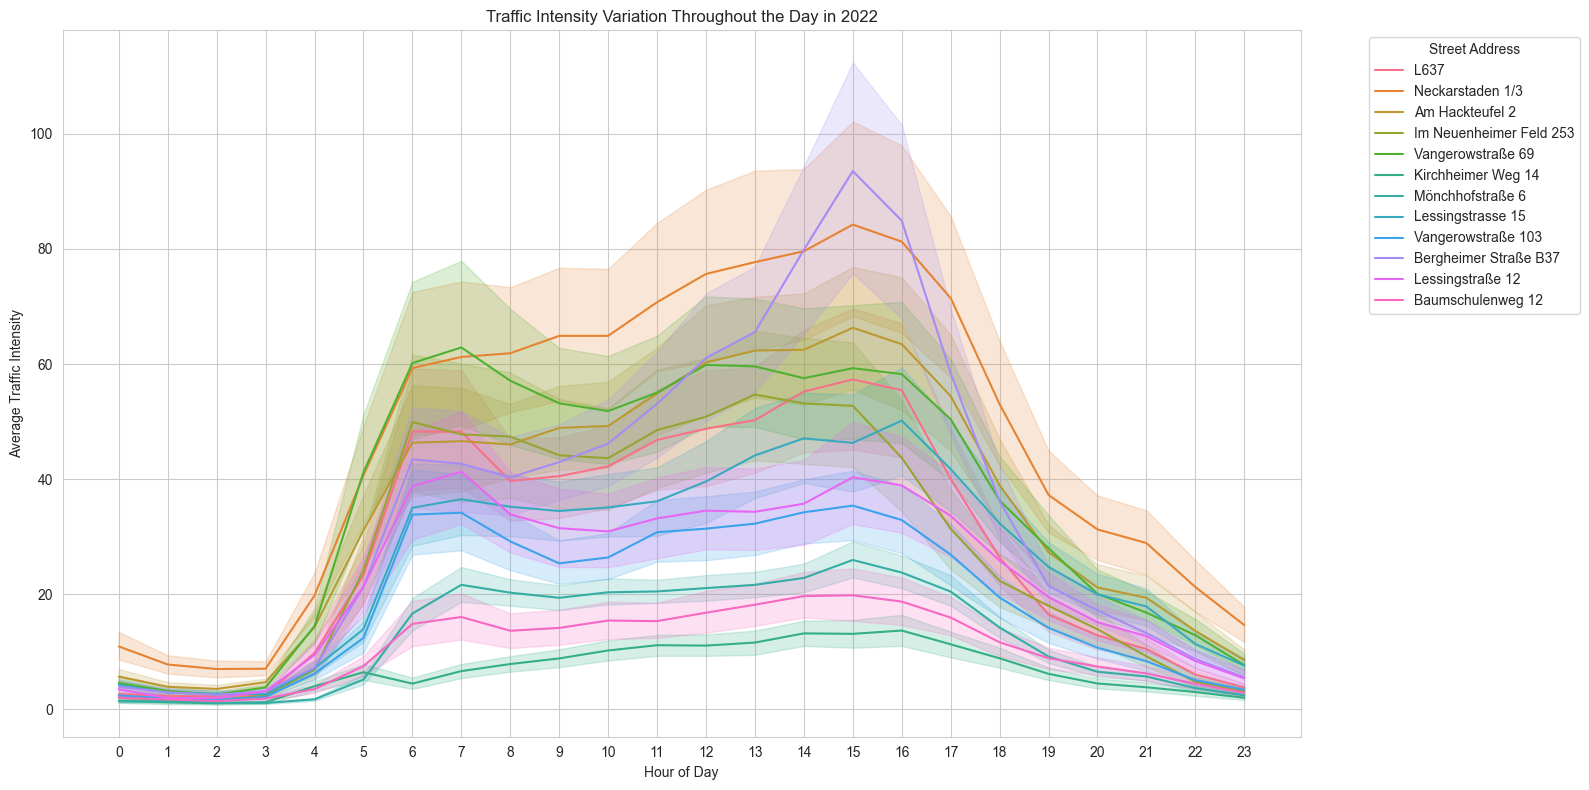

In [26]:
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

sns.lineplot(x='hourOfDay', y='intensity', hue='streetAddress',
             data=data_preprocessed[data_preprocessed['year'] == 2023],
             estimator='mean')

plt.title('Traffic Intensity Variation Throughout the Day in 2022')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Intensity')
plt.xticks(range(0, 24))
plt.legend(title='Street Address', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

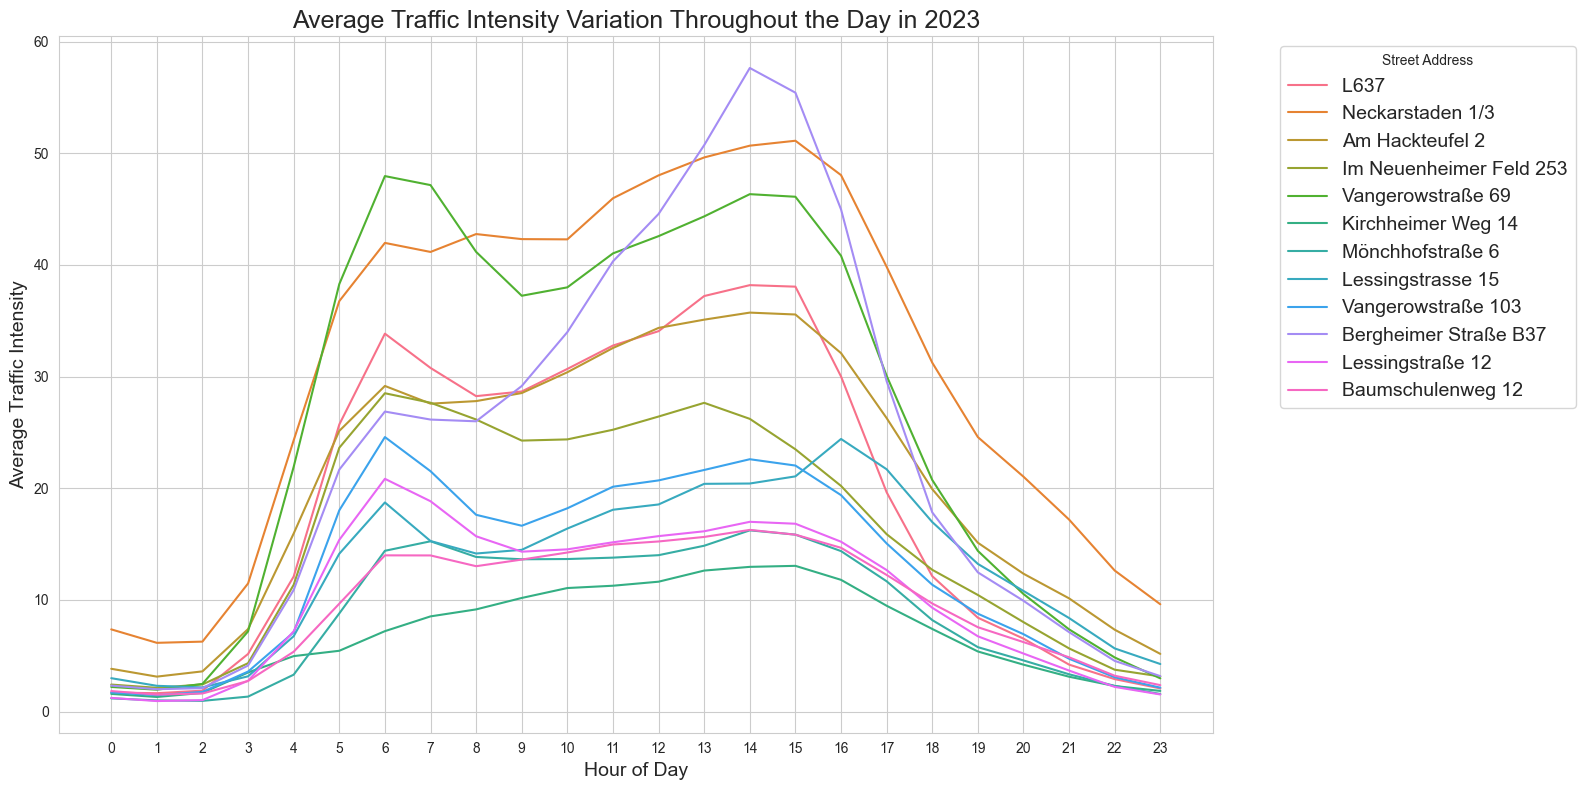

In [41]:
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

sns.lineplot(x='hourOfDay', y='intensity', hue='streetAddress',
             data=data_preprocessed[data_preprocessed['year'] == 2023],
             estimator='mean',errorbar=None)

plt.title('Average Traffic Intensity Variation Throughout the Day in 2023', fontsize=18)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Traffic Intensity', fontsize=14)
plt.xticks(range(0, 24))
plt.legend(title='Street Address', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.show()

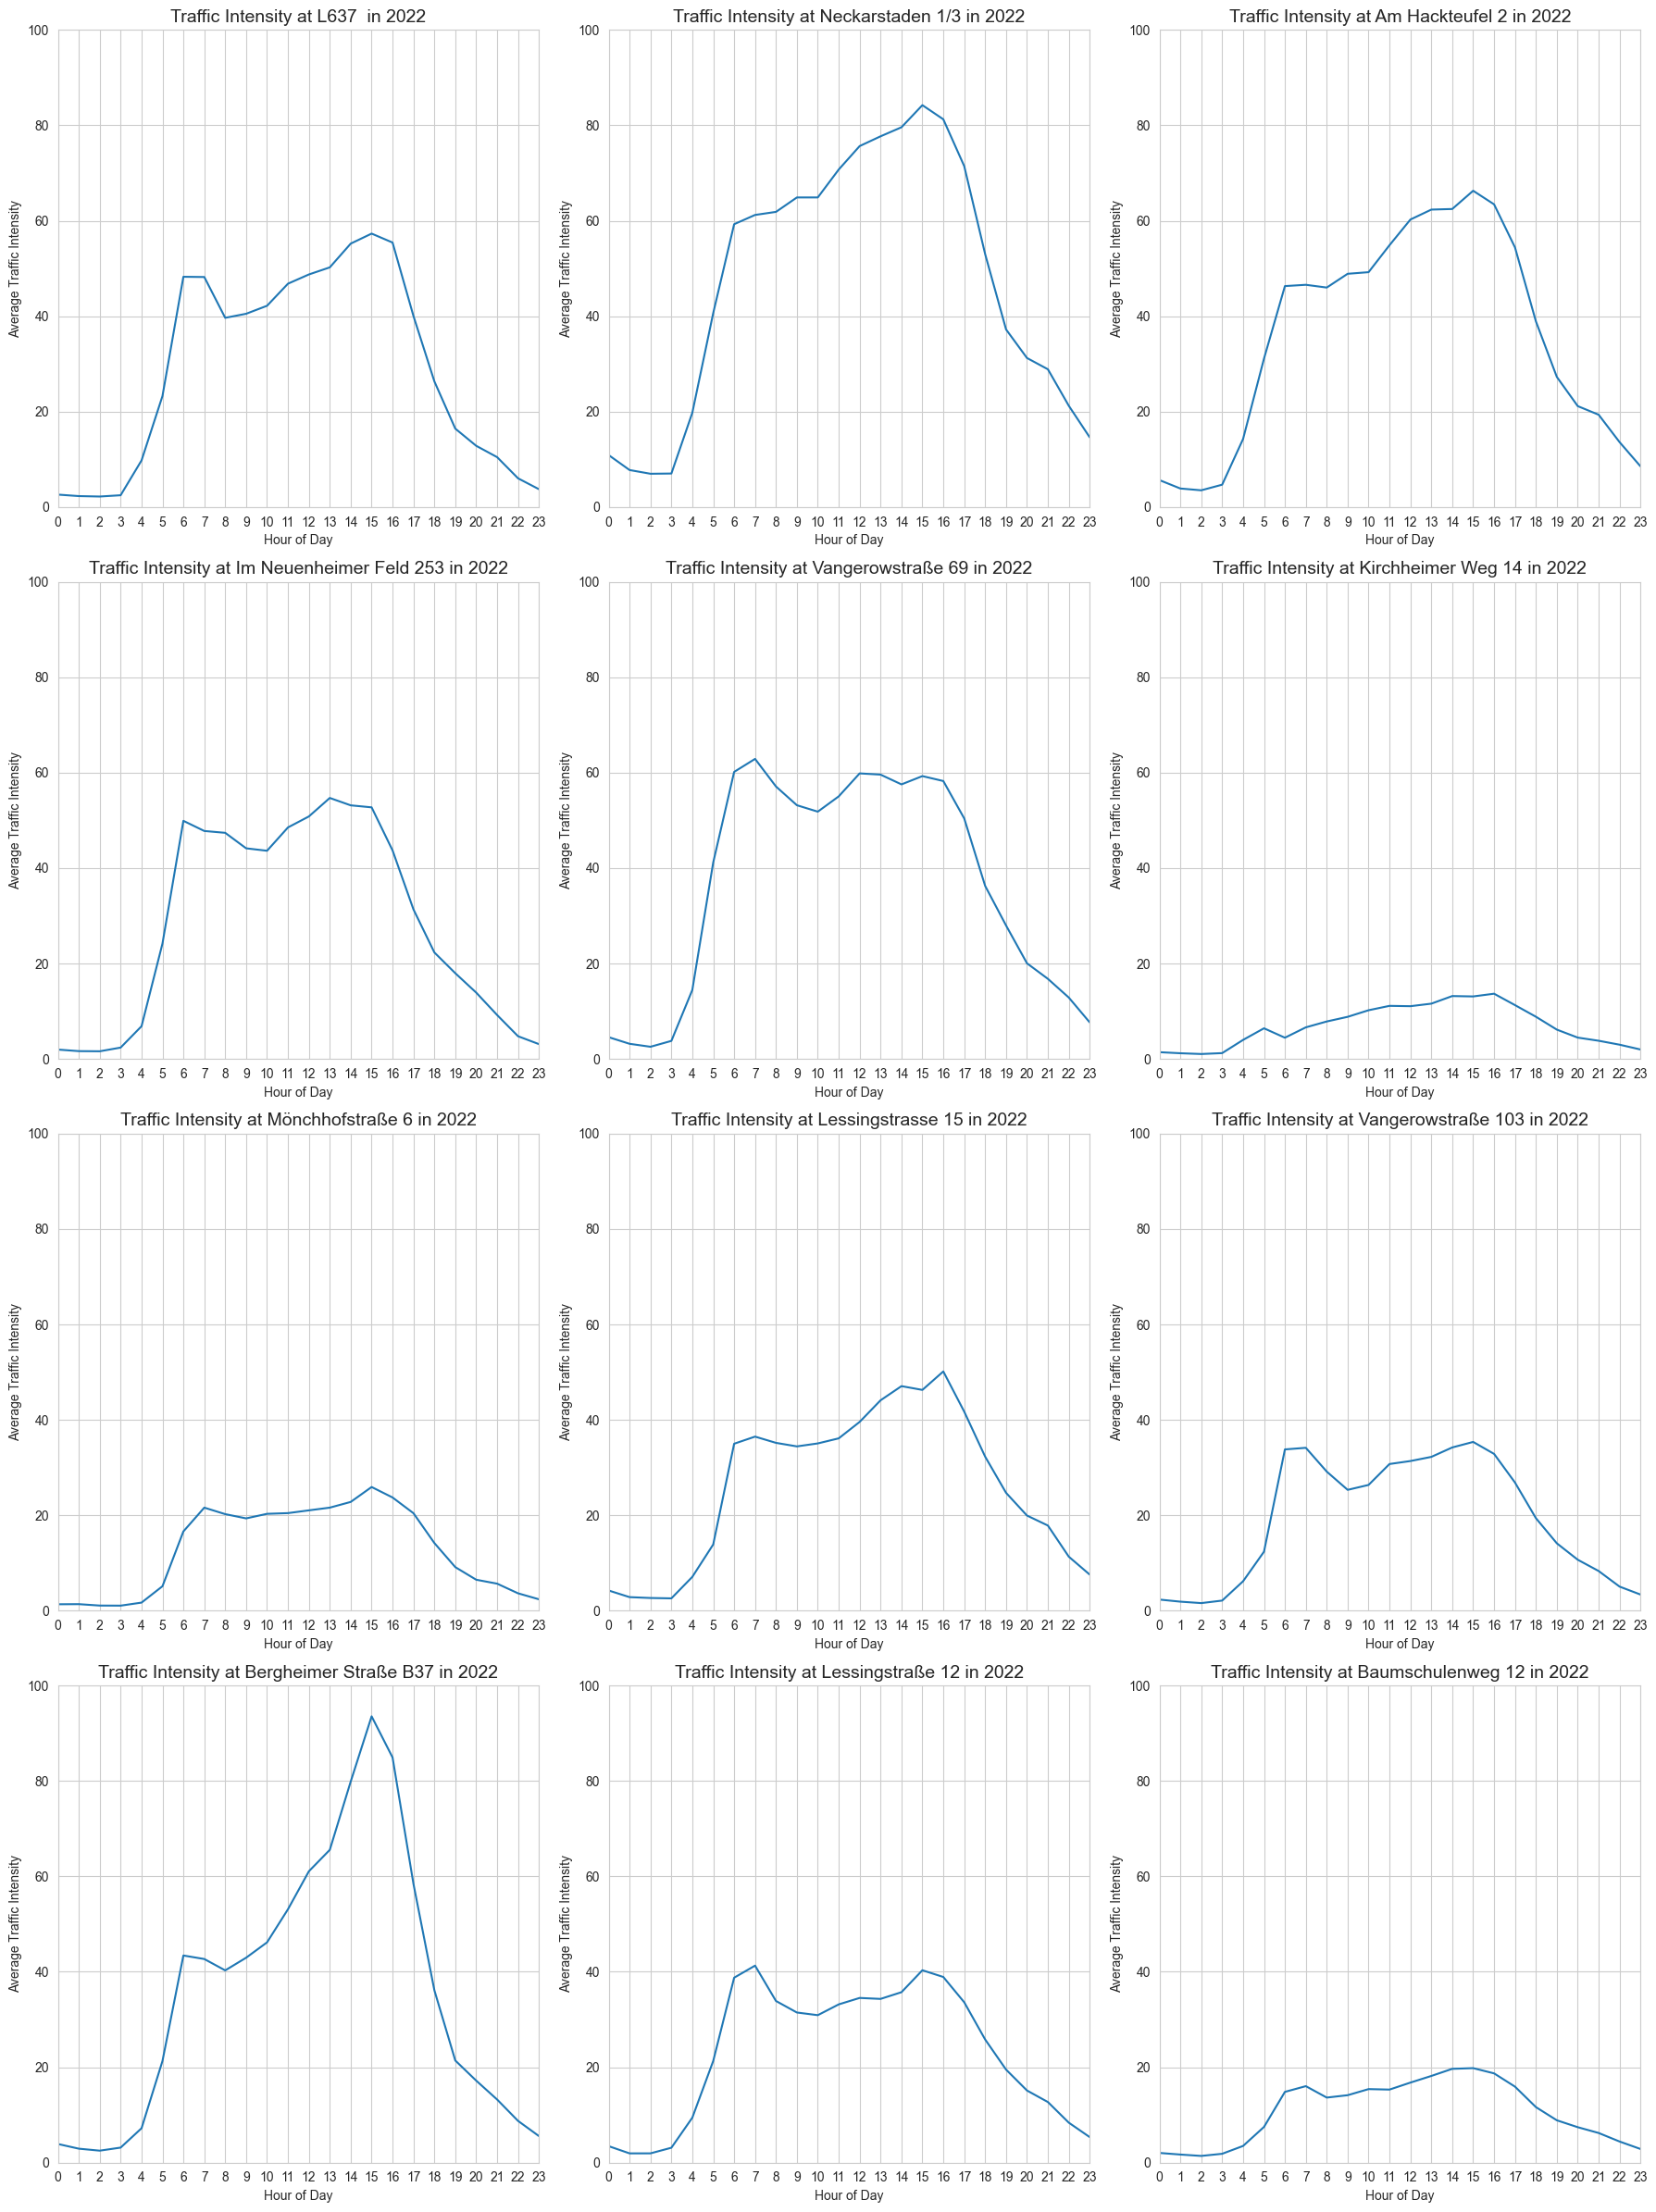

In [45]:
#number of rows for the subplots
addresses = data_preprocessed.streetAddress.unique()
n = len(addresses)
rows = int(np.ceil(n / 3))


# figure and grid of subplots
fig, axs = plt.subplots(rows, 3, figsize=(18, 6 * rows))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i, address in enumerate(addresses):
    sns.set_style("whitegrid")
    sns.lineplot(x='hourOfDay', y='intensity',
                 data=data_preprocessed[(data_preprocessed['year'] == 2022) & (data_preprocessed['streetAddress'] == address)],
                 estimator='mean', errorbar=None, ax=axs[i])
    #note estimatorname : Method for aggregating across multiple observations of the y variable at the same x level. If None, all observations will be drawn.
    axs[i].set_title(f'Traffic Intensity at {address} in 2022', fontsize=14)
    axs[i].set_xlabel('Hour of Day')
    axs[i].set_ylabel('Average Traffic Intensity')
    axs[i].set_xticks(range(0, 24))
    # Set the same y-axis scale for all plots
    axs[i].set_ylim(0, 100)
    # Set the same x-axis scale if needed
    axs[i].set_xlim(0, 23)
    axs[i].grid(True)

# Hide any unused axes if the number of plots is not a multiple of 3
for ax in axs[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


In [43]:
data_preprocessed[data_preprocessed['year']==2023]['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

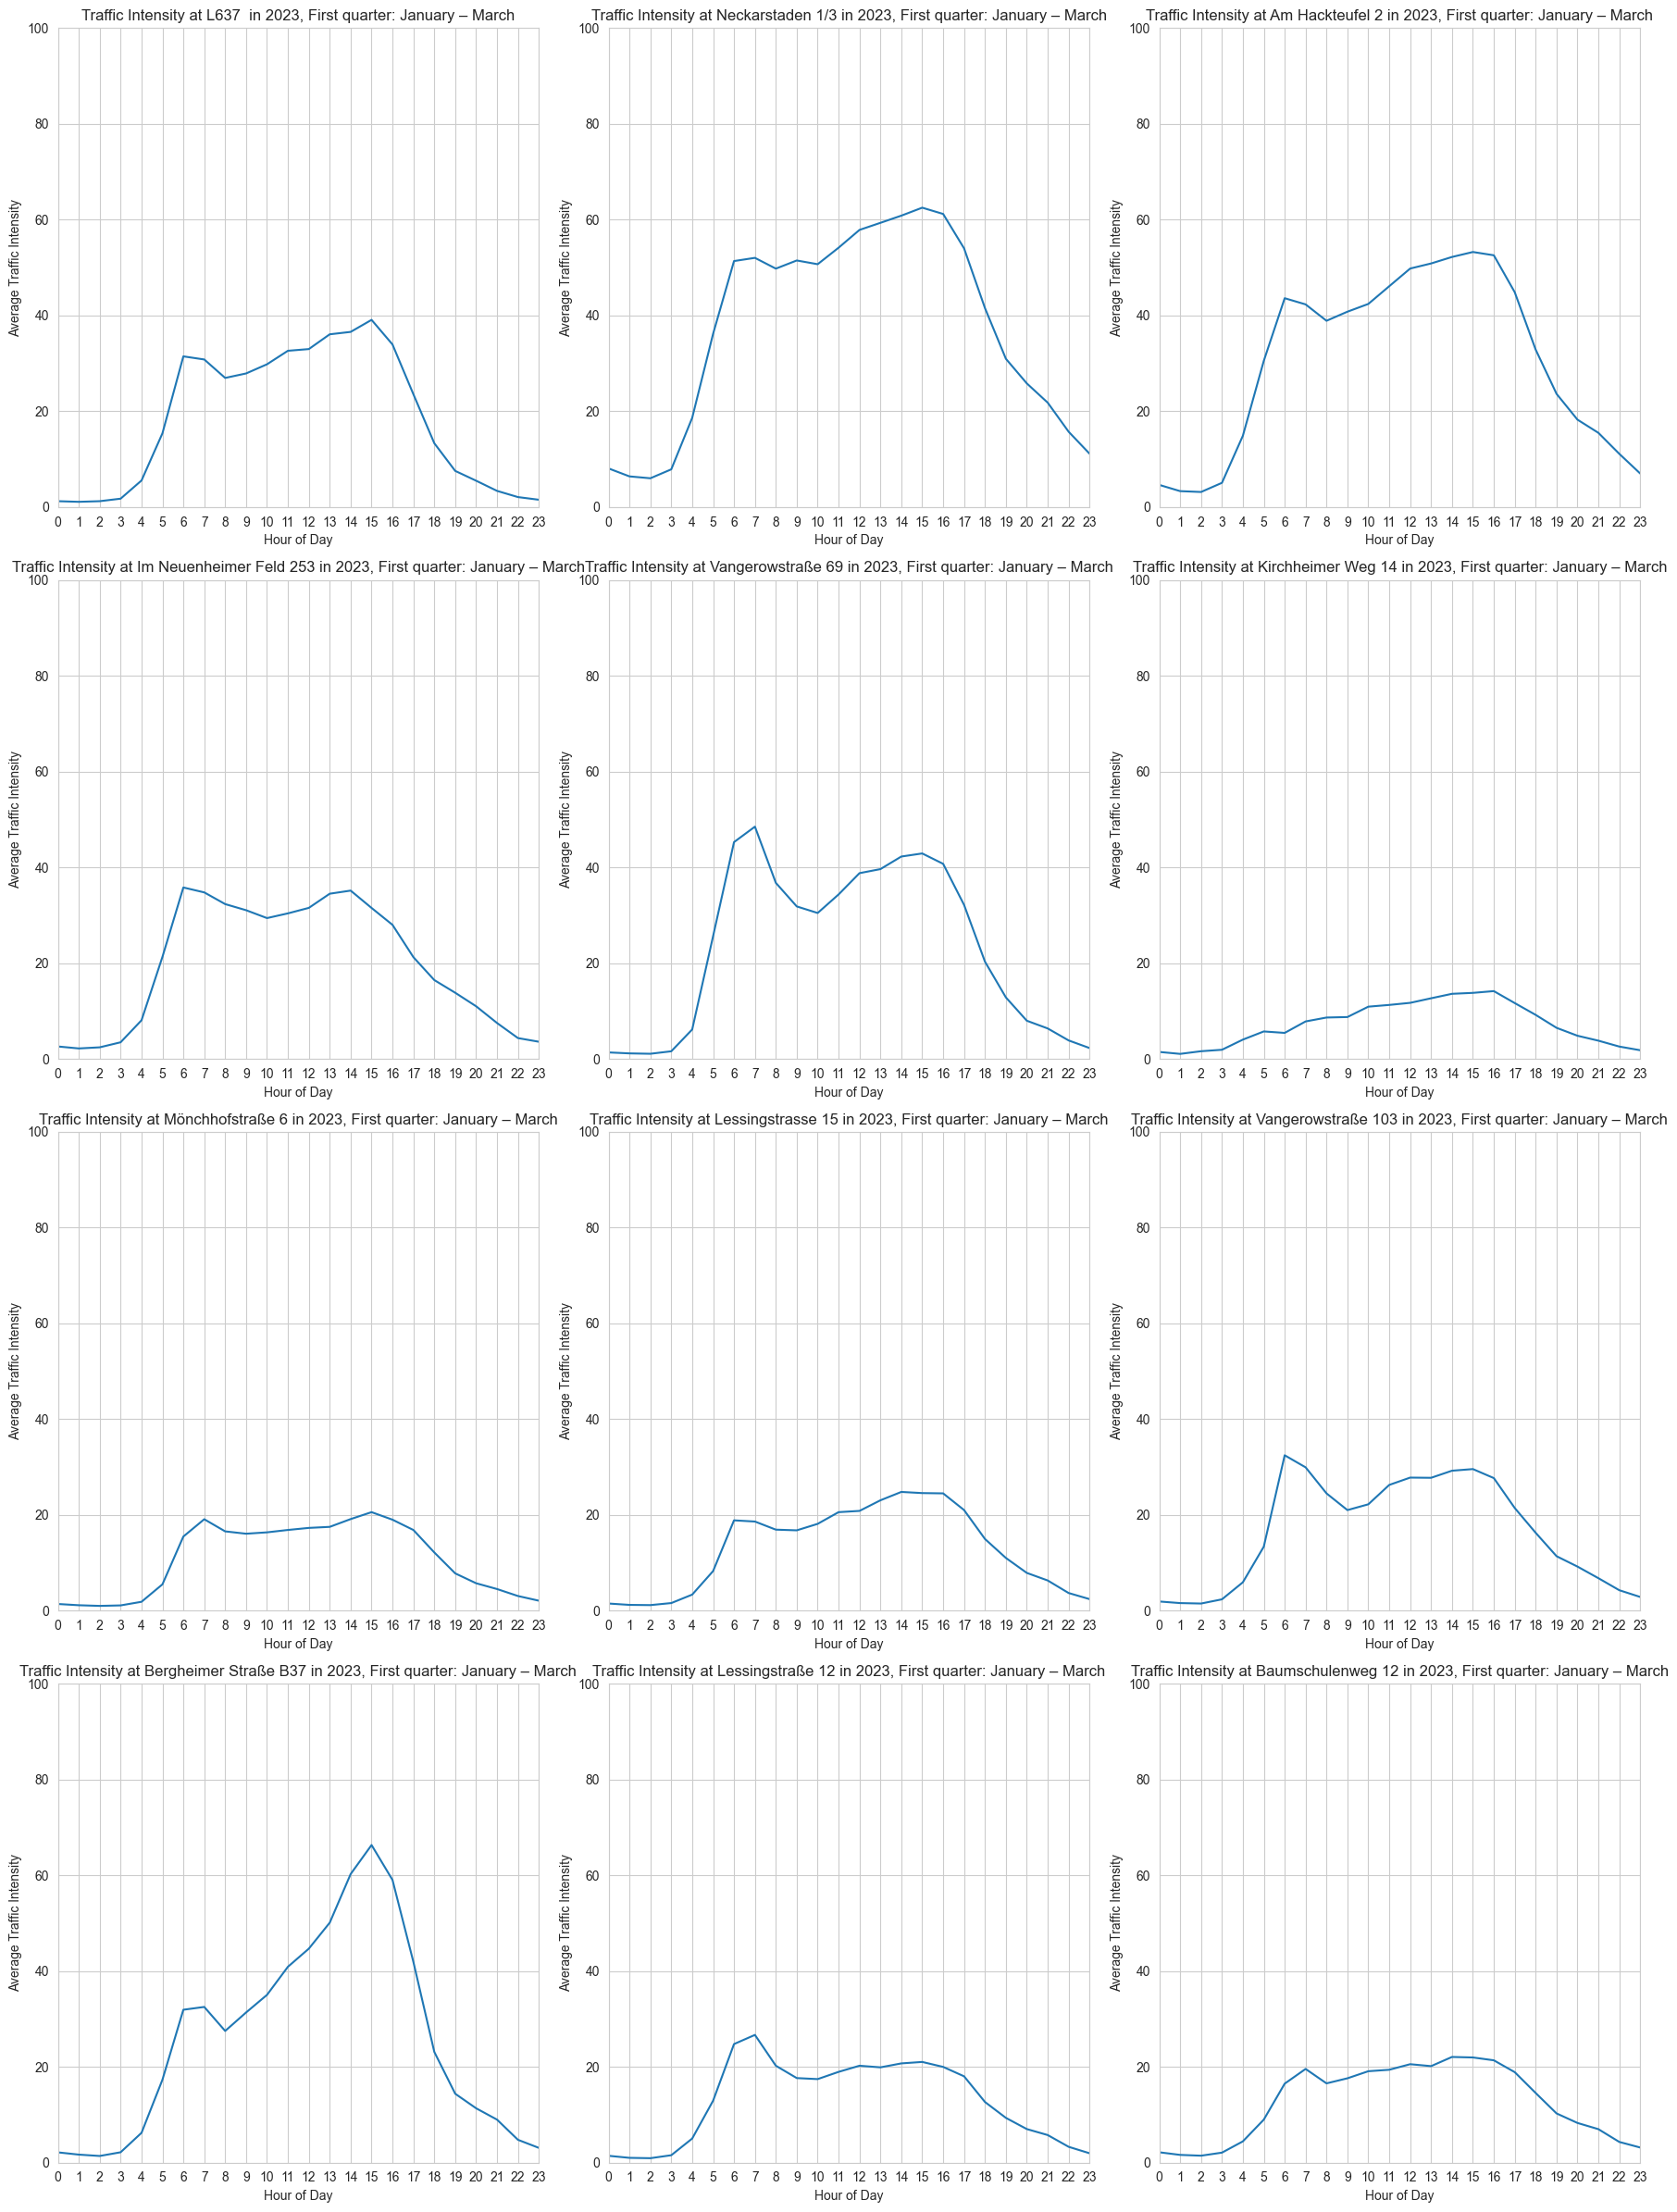

In [31]:
fig, axs = plt.subplots(rows, 3, figsize=(18, 6 * rows))
axs = axs.flatten()


for i, address in enumerate(addresses):
    sns.set_style("whitegrid")
    sns.lineplot(x='hourOfDay', y='intensity',
                 data=data_preprocessed[(data_preprocessed['year'] == 2023) & (data_preprocessed['streetAddress'] == address) &(data_preprocessed['month']<=3)],
                 estimator='mean', errorbar=None, ax=axs[i])

    axs[i].set_title(f'Traffic Intensity at {address} in 2023, First quarter: January – March')
    axs[i].set_xlabel('Hour of Day')
    axs[i].set_ylabel('Average Traffic Intensity')
    axs[i].set_xticks(range(0, 24))
    # Set the same y-axis scale for all plots
    axs[i].set_ylim(0, 100)
    # Set the same x-axis scale if needed
    axs[i].set_xlim(0, 23)
    axs[i].grid(True)

# Hide any unused axes if the number of plots is not a multiple of 3
for ax in axs[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [32]:
data[data['year']==2023].month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

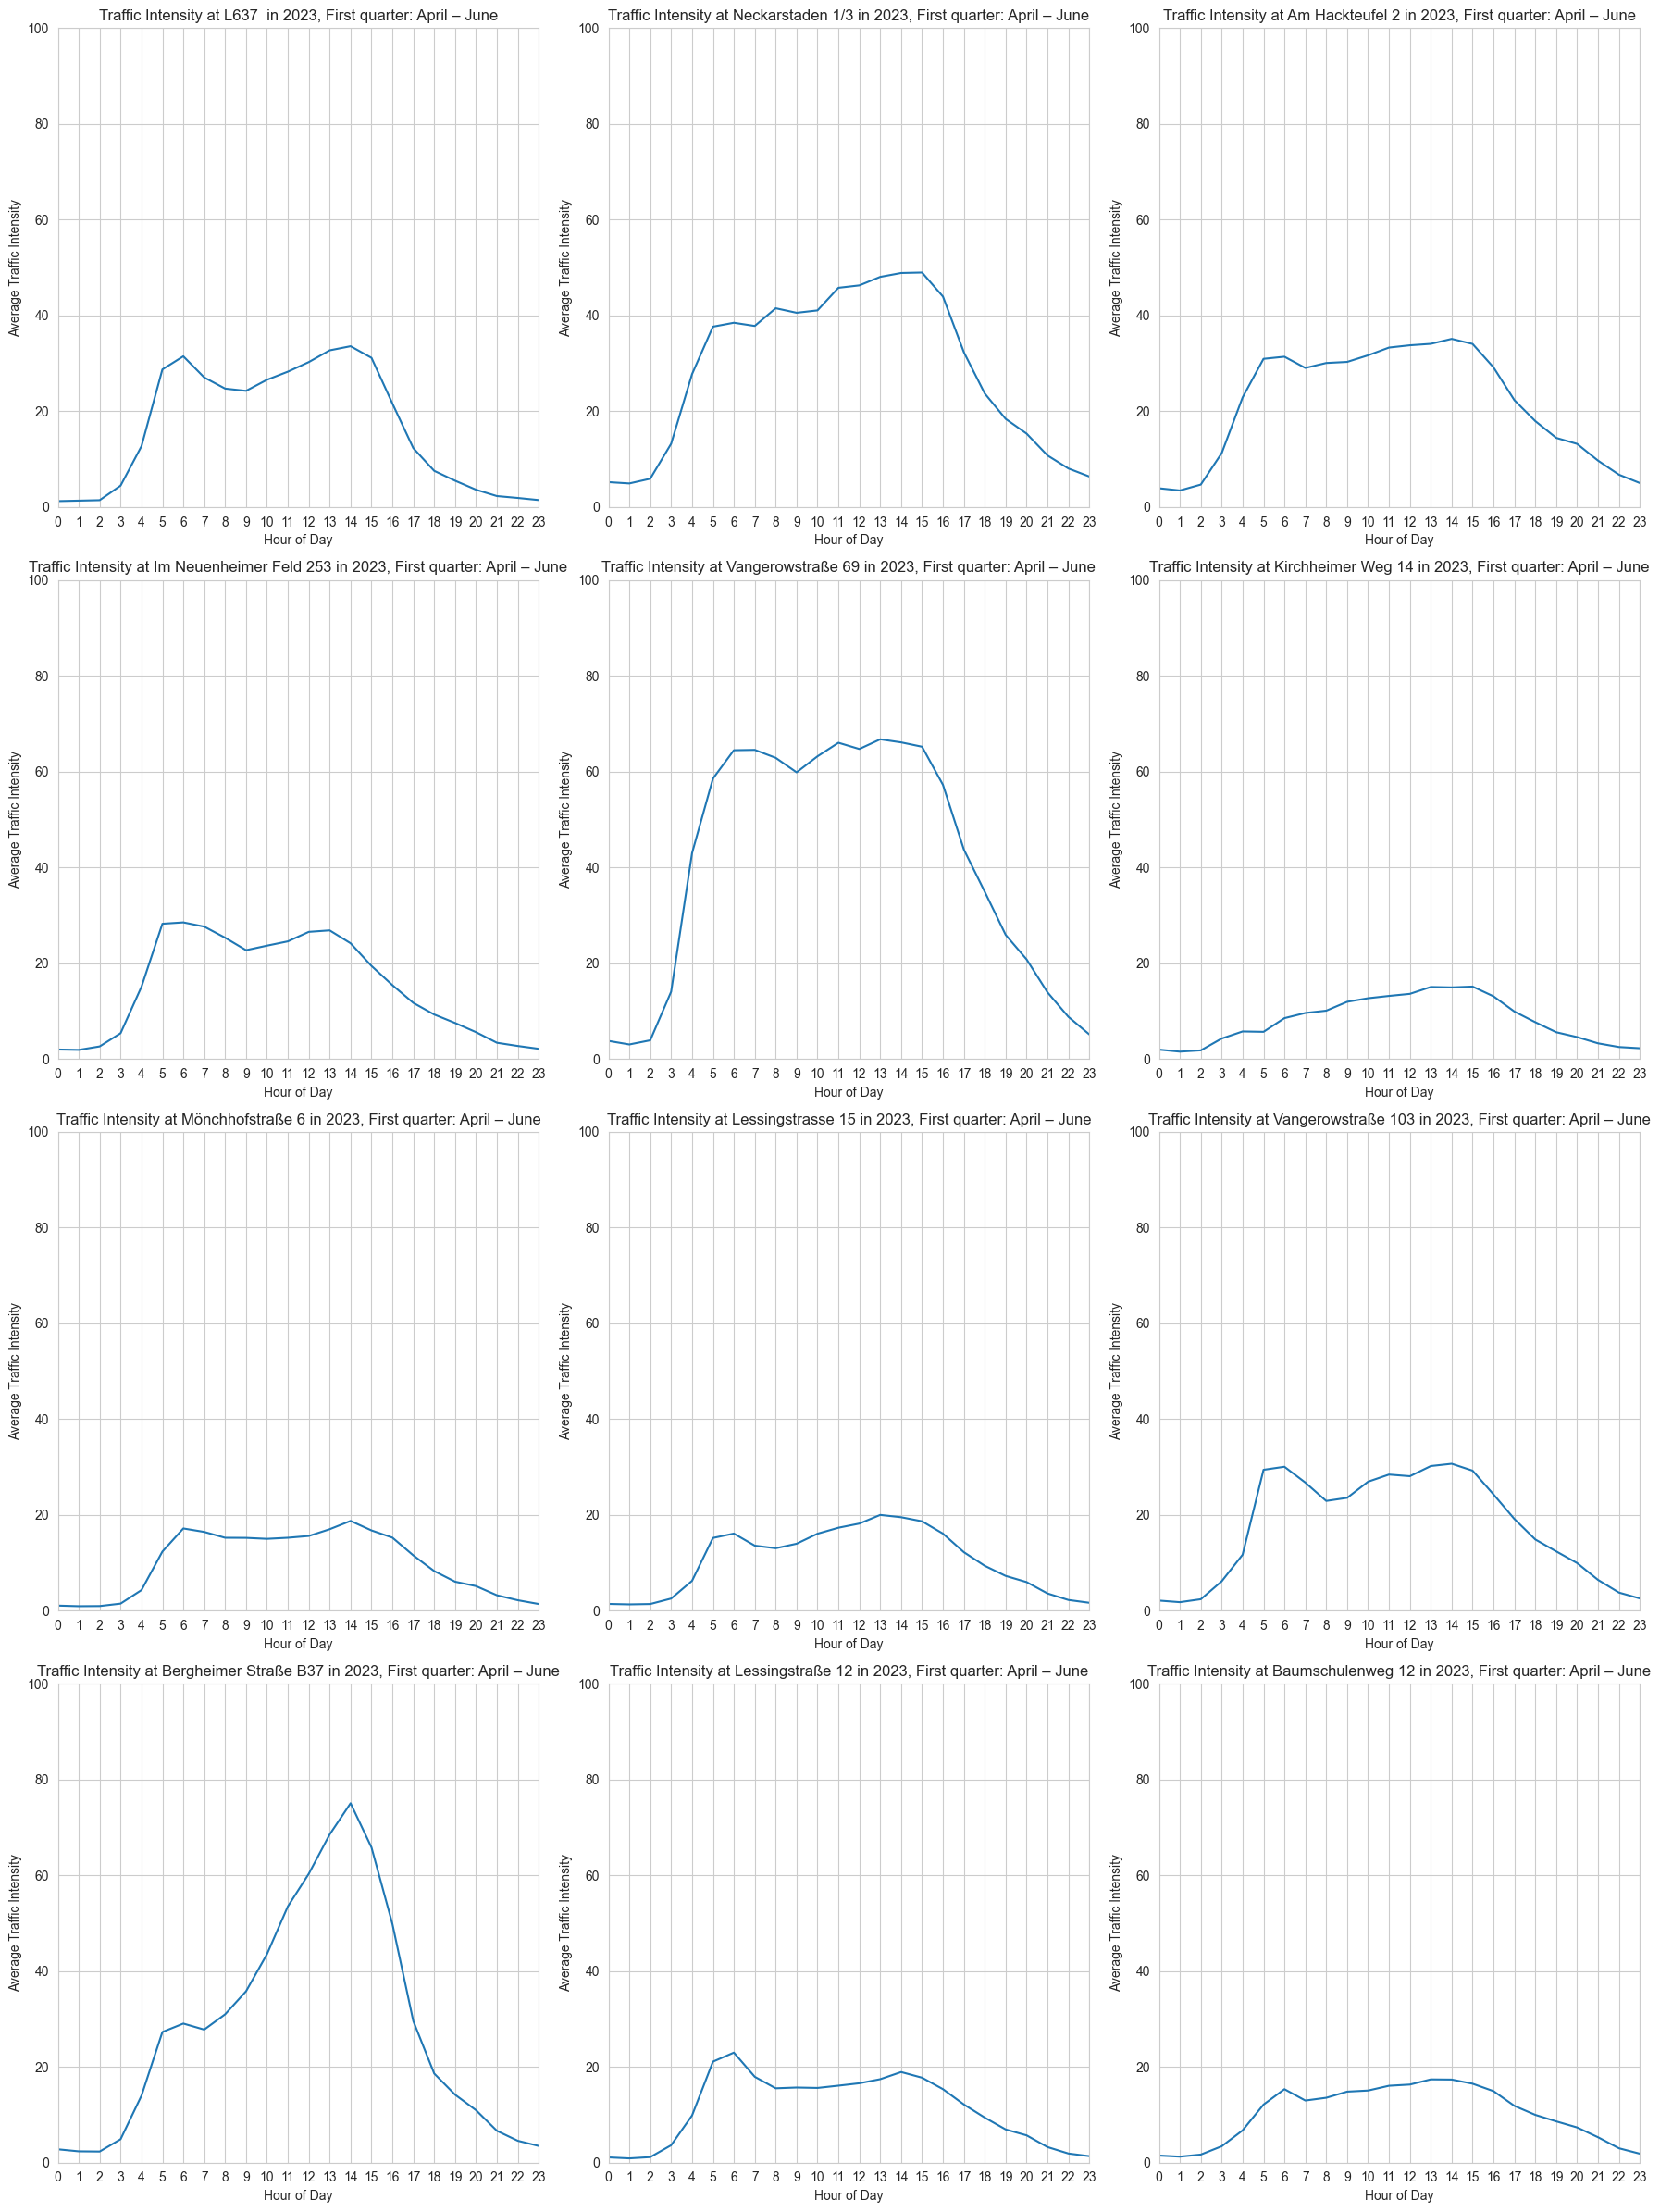

In [33]:
fig, axs = plt.subplots(rows, 3, figsize=(18, 6 * rows))
axs = axs.flatten()

for i, address in enumerate(addresses):
    sns.set_style("whitegrid")
    sns.lineplot(x='hourOfDay', y='intensity',
                 data=data_preprocessed[(data_preprocessed['year'] == 2023) & (data_preprocessed['streetAddress'] == address) &(data_preprocessed['month']>3)&(data_preprocessed['month']<7)],
                 estimator='mean', errorbar=None, ax=axs[i])

    axs[i].set_title(f'Traffic Intensity at {address} in 2023, First quarter: April – June')
    axs[i].set_xlabel('Hour of Day')
    axs[i].set_ylabel('Average Traffic Intensity')
    axs[i].set_xticks(range(0, 24))
    # Set the same y-axis and same x-axis  scale for all plots
    axs[i].set_ylim(0, 100)
    axs[i].set_xlim(0, 23)
    axs[i].grid(True)

# Hide any unused axes if the number of plots is not a multiple of 3
for ax in axs[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()
#note estimatorname : Method for aggregating across multiple observations of the y variable at the same x level. If None, all observations will be drawn.

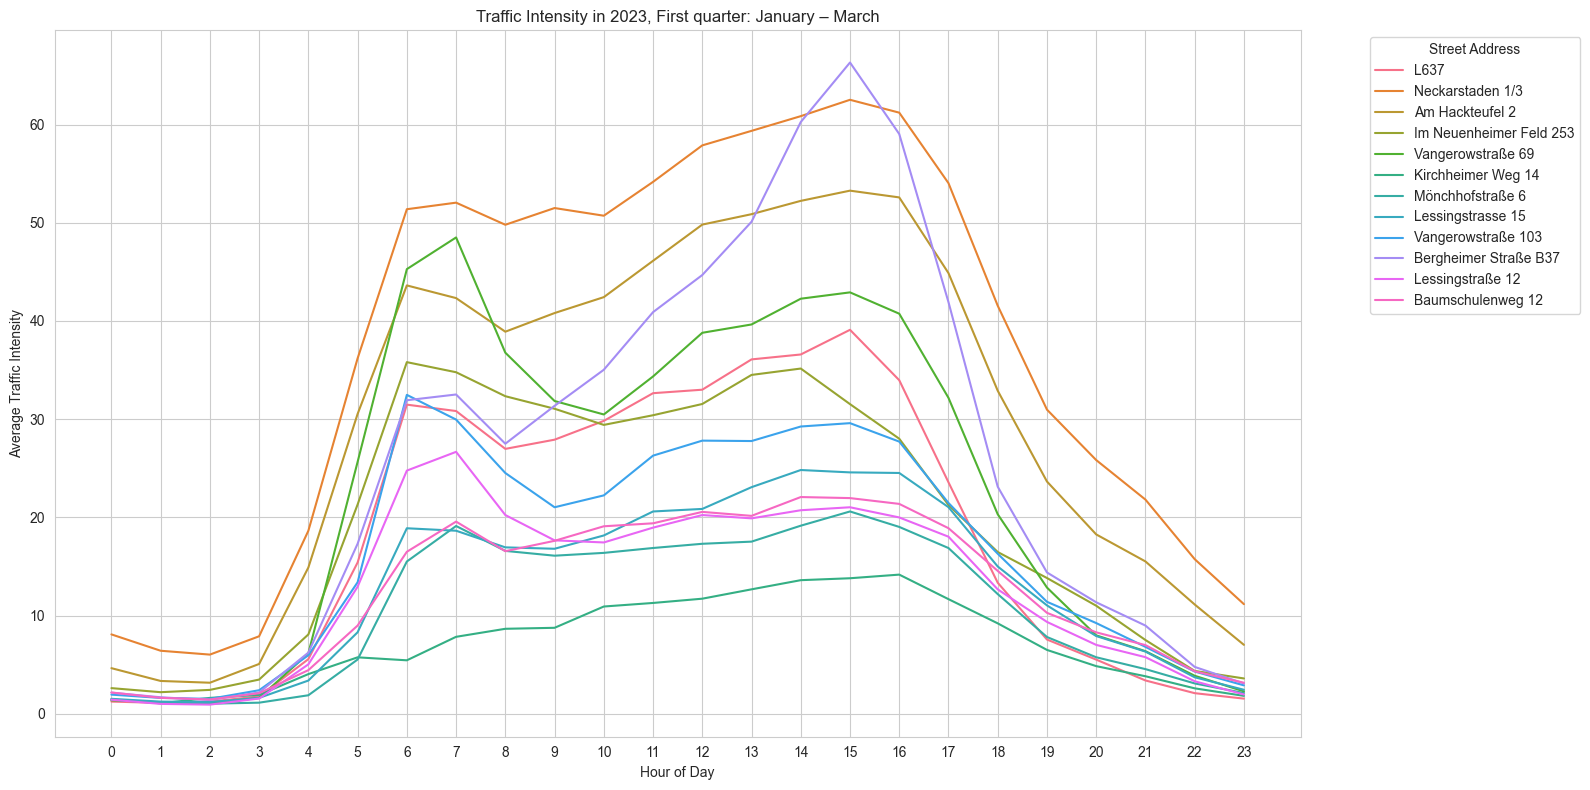

In [34]:
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

sns.lineplot(x='hourOfDay', y='intensity', hue='streetAddress',
             data=data_preprocessed[(data_preprocessed['year'] == 2023) &(data_preprocessed['month']<=3)],
             estimator='mean',errorbar=None)

plt.title(f'Traffic Intensity in 2023, First quarter: January – March')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Intensity')
plt.xticks(range(0, 24))
plt.legend(title='Street Address', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

In [35]:
data_preprocessed.to_csv('data_all_preprocessed.csv')

#### Traffic intensity by vehicleType

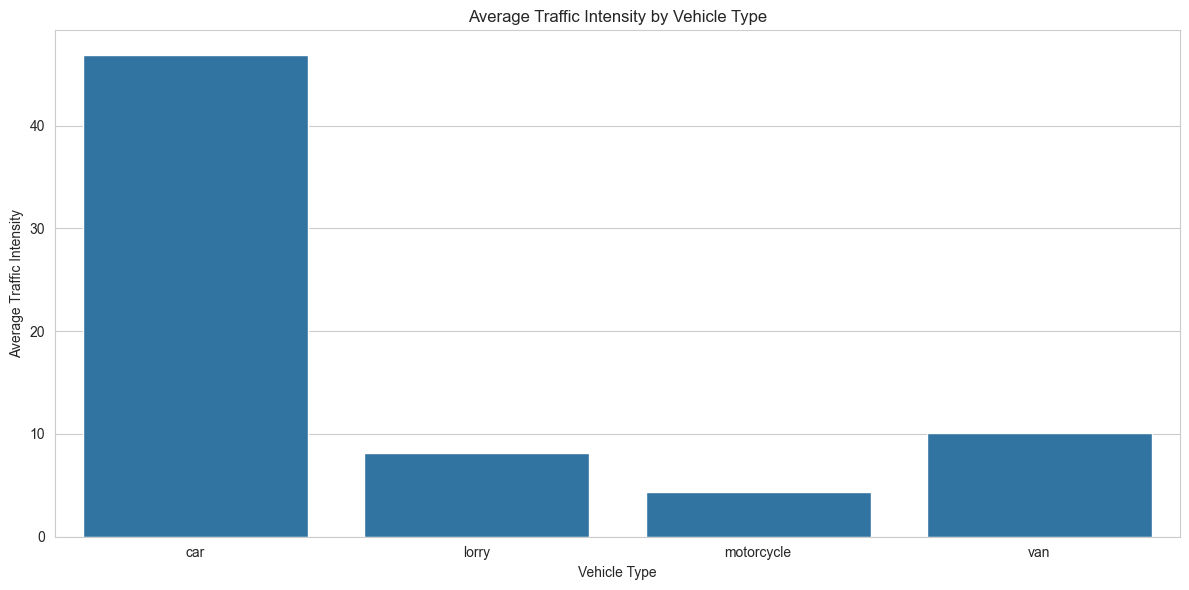

In [36]:
vehicle_types = encoder.categories_[0]
average_intensities = [data_preprocessed.loc[data_preprocessed[vehicle_type] == 1, 'intensity'].mean() for vehicle_type in vehicle_type_encoded_df.columns]
plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_types, y=average_intensities)
plt.title('Average Traffic Intensity by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Traffic Intensity')
plt.tight_layout()
plt.show()